### 지역별 전기차 증가율에 따른 지역선정

In [42]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import seaborn as sns
import platform

In [68]:
# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [44]:
# 차량 등록 현황 데이터 불러온 후 필요 행 및 열 설정
car = pd.read_excel('./data/rawdata/2022년_05월_자동차_등록자료_통계.xlsx',
                    sheet_name = '10.연료별_등록현황', 
                    header = 2, 
                    usecols='D:T',
                    skipfooter = 204)
car

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1625263.0,676378.0,579222.0,681927.0,310323.0,338664.0,296187.0,94829.0,3040155.0,363449.0,400193.0,522631.0,394239.0,383634.0,652362.0,847876.0,175956.0
4,21162.0,38539.0,4623.0,137641.0,1670.0,2570.0,1059.0,261.0,14561.0,1778.0,3346.0,2580.0,3117.0,83504.0,1713.0,40140.0,128352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,26.0,4.0,2.0,0.0,0.0,0.0,0.0,4.0,66.0,3.0,2.0,2.0,1.0,6.0,17.0,7.0,1.0
83,25065.0,11411.0,14582.0,10117.0,5256.0,7867.0,3057.0,2142.0,42356.0,7807.0,9649.0,11728.0,8218.0,9815.0,12662.0,13377.0,22685.0
84,21658.0,5219.0,4226.0,6742.0,1206.0,2346.0,1077.0,165.0,10883.0,1859.0,1560.0,984.0,1092.0,1287.0,1177.0,2444.0,4539.0


In [45]:
# 전기차 등록 현황 총계 값만 인덱싱
car = car.iloc[85:].reset_index(drop=True).T
car

,0
서울,46723.0
부산,16630.0
대구,18808.0
인천,16859.0
광주,6462.0
대전,10213.0
울산,4134.0
세종,2307.0
경기,53239.0
강원,9666.0


In [46]:
# 컬럼 정제
car['지역'] = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', 
               '충북', '충남', '전북', '전남', '경북', '경남', '제주']
car['차량수'] = car[0]

In [47]:
car_total = car.drop(columns=0).reset_index(drop=True)
car_total

,지역,차량수
0,서울,46723.0
1,부산,16630.0
2,대구,18808.0
3,인천,16859.0
4,광주,6462.0
5,대전,10213.0
6,울산,4134.0
7,세종,2307.0
8,경기,53239.0
9,강원,9666.0


In [48]:
# 충전소 데이터 불러오기
charge = pd.read_csv('./data/rawdata/전국_충전소_현황(기존데이터).csv')
charge

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,급속충전량,비고
0,환경부(한국자동차환경협회),신북보건지소공영주차장,21,DC콤보,전라남도,영암군,전라남도 영암군 신북면 간은정로 21-7,24시간 이용가능,NaN,급속(200kW동시),NaN
1,환경부(한국자동차환경협회),신북보건지소공영주차장,22,DC콤보,전라남도,영암군,전라남도 영암군 신북면 간은정로 21-7,24시간 이용가능,NaN,급속(200kW동시),NaN
2,환경부(한국자동차환경협회),한국생산기술연구원 대경본부바이오메디칼생산기술센터,1,DC콤보,경상북도,영천시,경상북도 영천시 양호길 59,24시간 이용가능,NaN,급속(100kW단독),NaN
3,환경부(한국자동차환경협회),한국생산기술연구원 대경본부바이오메디칼생산기술센터,2,DC콤보,경상북도,영천시,경상북도 영천시 양호길 59,24시간 이용가능,NaN,급속(100kW단독),NaN
4,환경부(한국자동차환경협회),(구)거진수산센터 주차장,11,DC콤보,강원도,고성군,강원도 고성군 거진읍 거진리 22-93,24시간 이용가능,NaN,급속(200kW동시),NaN
...,...,...,...,...,...,...,...,...,...,...,...
121020,한화솔루션,한화리조트 평창,5,AC완속,강원도,평창군,강원도 평창군 봉평면 태기로 228-33한화리조트 평창(946-7 한화리조트),24시간 이용가능,NaN,NaN,NaN
121021,한화솔루션,한화리조트 평창,6,AC완속,강원도,평창군,강원도 평창군 봉평면 태기로 228-33한화리조트 평창(946-7 한화리조트),24시간 이용가능,NaN,NaN,NaN
121022,한화솔루션,한화리조트 평창,7,AC완속,강원도,평창군,강원도 평창군 봉평면 태기로 228-33한화리조트 평창(946-7 한화리조트),24시간 이용가능,NaN,NaN,NaN
121023,한화솔루션,한화리조트 평창,8,AC완속,강원도,평창군,강원도 평창군 봉평면 태기로 228-33한화리조트 평창(946-7 한화리조트),24시간 이용가능,NaN,NaN,NaN


In [49]:
# 지역 컬럼 이상 문자열 처리 
charge['지역'] = charge['지역'].str.strip()

In [50]:
# 충전소 데이터 중복치 확인 (갯수만 필요하기 때문에 결측치, 이상치 생략)
charge[charge.duplicated()]

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,급속충전량,비고
4666,환경부(한국자동차환경협회),입장휴게소(서울방향),1,DC차데모+AC3상+DC콤보,충청남도,천안시,충청남도 천안시 서북구 입장면 연곡길 407,24시간 이용가능,NaN,급속(50kW),NaN
44802,지커넥트,센텀리더스마크,1,AC완속,부산광역시,해운대구,부산광역시 해운대구 APEC로 17(우동)(1514 센텀리더스마크),24시간 이용가능,NaN,NaN,NaN
44804,지커넥트,센텀리더스마크,2,AC완속,부산광역시,해운대구,부산광역시 해운대구 APEC로 17(우동)(1514 센텀리더스마크),24시간 이용가능,NaN,NaN,NaN
46674,지커넥트,올림픽파크한양수자인,1,AC완속,서울특별시,강동구,"서울특별시 강동구 성내로 80(성내동, 올림픽파크한양수자인)(606 올림픽파크한양수자인)",24시간 이용가능,거주자외 출입제한,NaN,NaN
46676,지커넥트,올림픽파크한양수자인,2,AC완속,서울특별시,강동구,"서울특별시 강동구 성내로 80(성내동, 올림픽파크한양수자인)(606 올림픽파크한양수자인)",24시간 이용가능,거주자외 출입제한,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
110145,휴맥스이브이,서청주파크자이,7,AC완속,충청북도,청주시,충청북도 청주시 흥덕구 2순환로 1106(422 서청주파크자이),24시간 이용가능,NaN,NaN,NaN
110147,휴맥스이브이,서청주파크자이,8,AC완속,충청북도,청주시,충청북도 청주시 흥덕구 2순환로 1106(422 서청주파크자이),24시간 이용가능,NaN,NaN,NaN
110149,휴맥스이브이,서청주파크자이,9,AC완속,충청북도,청주시,충청북도 청주시 흥덕구 2순환로 1106(422 서청주파크자이),24시간 이용가능,NaN,NaN,NaN
110151,휴맥스이브이,서청주파크자이,10,AC완속,충청북도,청주시,충청북도 청주시 흥덕구 2순환로 1106(422 서청주파크자이),24시간 이용가능,NaN,NaN,NaN


In [51]:
# 충전기 ID값으로 보아 실제 중복치로 판단하여 중복치 제거
charge.drop_duplicates(inplace=True)
charge[charge.duplicated()]

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,급속충전량,비고


In [52]:
# 인덱스 재정렬
charge.reset_index(drop=True,inplace=True)
charge

,운영기관,충전소,충전기ID,충전기타입,지역,시군구,주소,이용가능시간,이용자 제한,급속충전량,비고
0,환경부(한국자동차환경협회),신북보건지소공영주차장,21,DC콤보,전라남도,영암군,전라남도 영암군 신북면 간은정로 21-7,24시간 이용가능,NaN,급속(200kW동시),NaN
1,환경부(한국자동차환경협회),신북보건지소공영주차장,22,DC콤보,전라남도,영암군,전라남도 영암군 신북면 간은정로 21-7,24시간 이용가능,NaN,급속(200kW동시),NaN
2,환경부(한국자동차환경협회),한국생산기술연구원 대경본부바이오메디칼생산기술센터,1,DC콤보,경상북도,영천시,경상북도 영천시 양호길 59,24시간 이용가능,NaN,급속(100kW단독),NaN
3,환경부(한국자동차환경협회),한국생산기술연구원 대경본부바이오메디칼생산기술센터,2,DC콤보,경상북도,영천시,경상북도 영천시 양호길 59,24시간 이용가능,NaN,급속(100kW단독),NaN
4,환경부(한국자동차환경협회),(구)거진수산센터 주차장,11,DC콤보,강원도,고성군,강원도 고성군 거진읍 거진리 22-93,24시간 이용가능,NaN,급속(200kW동시),NaN
...,...,...,...,...,...,...,...,...,...,...,...
120894,한화솔루션,한화리조트 평창,5,AC완속,강원도,평창군,강원도 평창군 봉평면 태기로 228-33한화리조트 평창(946-7 한화리조트),24시간 이용가능,NaN,NaN,NaN
120895,한화솔루션,한화리조트 평창,6,AC완속,강원도,평창군,강원도 평창군 봉평면 태기로 228-33한화리조트 평창(946-7 한화리조트),24시간 이용가능,NaN,NaN,NaN
120896,한화솔루션,한화리조트 평창,7,AC완속,강원도,평창군,강원도 평창군 봉평면 태기로 228-33한화리조트 평창(946-7 한화리조트),24시간 이용가능,NaN,NaN,NaN
120897,한화솔루션,한화리조트 평창,8,AC완속,강원도,평창군,강원도 평창군 봉평면 태기로 228-33한화리조트 평창(946-7 한화리조트),24시간 이용가능,NaN,NaN,NaN


In [53]:
charge_total = charge.groupby('지역')[['충전소']].count().reset_index()
charge_total

,지역,충전소
0,강원도,3867
1,경기도,30097
2,경상남도,6752
3,경상북도,6966
4,광주광역시,3781
5,대구광역시,7366
6,대전광역시,3254
7,부산광역시,6308
8,서울특별시,21748
9,세종특별자치시,1199


In [55]:
car_total = car_total.sort_values('지역').reset_index(drop=True)
car_total

,지역,차량수
0,강원,9666.0
1,경기,53239.0
2,경남,15821.0
3,경북,13839.0
4,광주,6462.0
5,대구,18808.0
6,대전,10213.0
7,부산,16630.0
8,서울,46723.0
9,세종,2307.0


In [56]:
car_total['지역'].values

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [57]:
sido_list = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', 
             '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']

In [58]:
# 지역 순서 확인을 위한 컬럼 설정
charge_total['지역2'] = sido_list
charge_total

,지역,충전소,지역2
0,강원도,3867,강원
1,경기도,30097,경기
2,경상남도,6752,경남
3,경상북도,6966,경북
4,광주광역시,3781,광주
5,대구광역시,7366,대구
6,대전광역시,3254,대전
7,부산광역시,6308,부산
8,서울특별시,21748,서울
9,세종특별자치시,1199,세종


In [59]:
# merge를 위한 컬럼 수정
charge_total['지역'] = charge_total['지역2']
charge_total = charge_total.drop(columns='지역2')
charge_total

,지역,충전소
0,강원,3867
1,경기,30097
2,경남,6752
3,경북,6966
4,광주,3781
5,대구,7366
6,대전,3254
7,부산,6308
8,서울,21748
9,세종,1199


In [60]:
car_charge_total = pd.merge(car_total ,charge_total, left_on='지역',right_on='지역',how='inner')
car_charge_total

,지역,차량수,충전소
0,강원,9666.0,3867
1,경기,53239.0,30097
2,경남,15821.0,6752
3,경북,13839.0,6966
4,광주,6462.0,3781
5,대구,18808.0,7366
6,대전,10213.0,3254
7,부산,16630.0,6308
8,서울,46723.0,21748
9,세종,2307.0,1199


In [61]:
car_charge_total['차량수'] = car_charge_total['차량수'].astype(int)
car_charge_total

,지역,차량수,충전소
0,강원,9666,3867
1,경기,53239,30097
2,경남,15821,6752
3,경북,13839,6966
4,광주,6462,3781
5,대구,18808,7366
6,대전,10213,3254
7,부산,16630,6308
8,서울,46723,21748
9,세종,2307,1199


In [89]:
car_charge_total['차량수/충전소'] = round(car_charge_total['차량수'] /car_charge_total['충전소'],1)
car_charge_total['충전소/차량수'] = round(car_charge_total['충전소'] /car_charge_total['차량수'],1)
car_charge_total

,지역,차량수,충전소,차량수/충전소,충전소/차량수
0,강원,9666,3867,2.5,0.4
1,경기,53239,30097,1.8,0.6
2,경남,15821,6752,2.3,0.4
3,경북,13839,6966,2.0,0.5
4,광주,6462,3781,1.7,0.6
5,대구,18808,7366,2.6,0.4
6,대전,10213,3254,3.1,0.3
7,부산,16630,6308,2.6,0.4
8,서울,46723,21748,2.1,0.5
9,세종,2307,1199,1.9,0.5


In [90]:
car_charge_total['충전소/차량수'].values

array([0.4, 0.6, 0.4, 0.5, 0.6, 0.4, 0.3, 0.4, 0.5, 0.5, 0.5, 0.3, 0.4,
       0.5, 0.2, 0.4, 0.3])

In [77]:
total_list = [0.4, 0.6, 0.4, 0.5, 0.6, 0.4, 0.3, 0.4, 0.5, 0.5, 0.5, 0.3, 0.4, 0.5, 0.2, 0.4, 0.3]

In [64]:
np.arange(0,2,0.2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8])

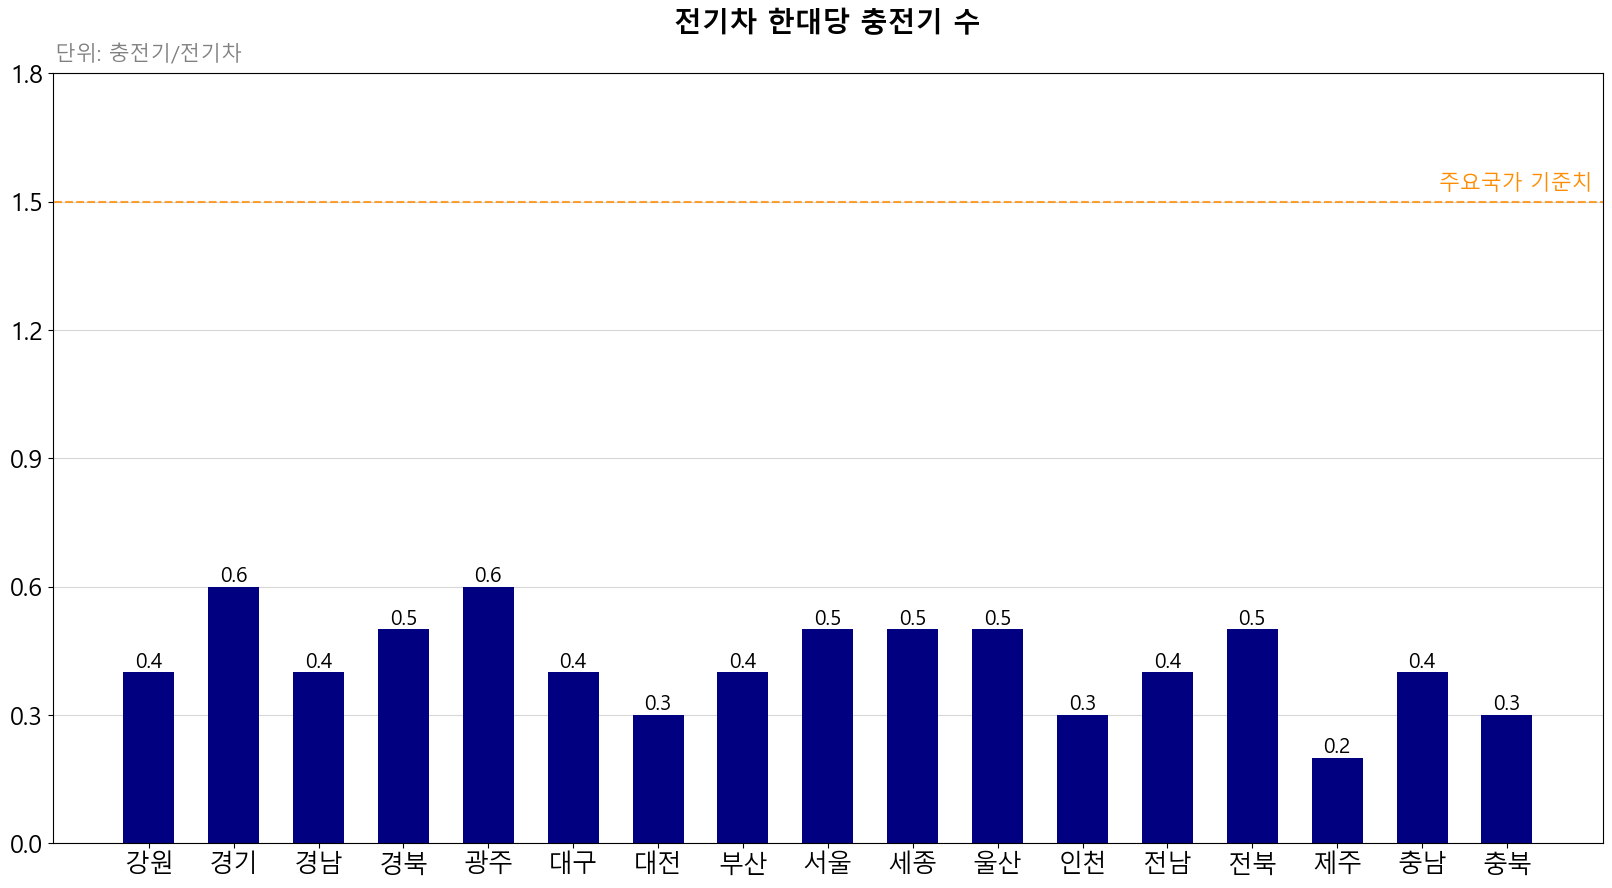

In [164]:
ylist = np.arange(0,2.0,0.3)
plt.figure(figsize=(20,10))
plt.rc('font', family = 'Malgun Gothic', size = 18)
ax = plt.title('전기차 한대당 충전기 수',fontsize = 20,loc='center', pad=30, fontweight="bold")
plt.grid(True, axis='y',alpha=0.5,)
# ax.set_axisbelow(True)
plt.hlines(xmin=-2,xmax=20, y=1.5,colors='darkorange',alpha=0.8,linestyles='dashed')
plt.text(15.2, 1.53, '주요국가 기준치', fontsize=15, color = 'darkorange')
plt.text(-1.1, 1.83, '단위: 충전기/전기차', fontsize=15, color = 'grey')
plt.bar(car_charge_total['지역'],car_charge_total['충전소/차량수'],width=0.6, color ='navy')
plt.yticks(ylist)
plt.xlabel('')
plt.ylabel('')
# 그래프 상단에 값 추가하기
for i, v in enumerate(car_charge_total['지역']):
    plt.text(v, car_charge_total['충전소/차량수'][i], car_charge_total['충전소/차량수'][i],# 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()